Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

🎓 Laboratório 9 - Regressão Logística (Parte 2)

---
> 👨‍🏫*Professor Rooney Coelho (rracoelho@pucsp.br)*
---

Concluindo esta atividade você se tornará apto a ser um mestre Pokemon! Vamos ensinar o computador a reconhecer qual o tipo de cada Pokemon. 

<img src='https://tm.ibxk.com.br/2019/09/30/30091641838086.jpg?ims=1120x420' width=500>

Para esta atividade vamos focar apenas em três tipos, grama, fogo e água. Fique a vontade para treinar o seu modelo para reconhecer mais tipos, assim você pode ganhar insignias nos ginásios com maior facilidade (o professor de vocês não tem nada melhor para fazer mesmo...)

É necessário instalar algumas bibliotecas antes de executar a célula abaixo com êxito, busque na internet como fazer isso dependendo do erro que você obter.

In [1]:
# Importe aqui as bibliotecas necessárias
import pandas as pd
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

### 1) Carregue a base de dados com os metadados de todos os Pokemons

Coloque como índice a coluna `pokedex_number`, ela é como o CPF de cada Pokemon.

In [2]:
df = pd.read_csv('dados/pokemon.csv')
df.set_index('pokedex_number', inplace=True)
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,percentage_male,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,0
3,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,Venusaur,88.1,122,120,80,grass,poison,100.0,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmander,88.1,60,50,65,fire,NaN,8.5,1,0
5,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,Charmeleon,88.1,80,65,80,fire,NaN,19.0,1,0


Veja aqui quais são as colunas existentes.

In [3]:
df.columns.to_list()

['abilities',
 'against_bug',
 'against_dark',
 'against_dragon',
 'against_electric',
 'against_fairy',
 'against_fight',
 'against_fire',
 'against_flying',
 'against_ghost',
 'against_grass',
 'against_ground',
 'against_ice',
 'against_normal',
 'against_poison',
 'against_psychic',
 'against_rock',
 'against_steel',
 'against_water',
 'attack',
 'base_egg_steps',
 'base_happiness',
 'base_total',
 'capture_rate',
 'classfication',
 'defense',
 'experience_growth',
 'height_m',
 'hp',
 'japanese_name',
 'name',
 'percentage_male',
 'sp_attack',
 'sp_defense',
 'speed',
 'type1',
 'type2',
 'weight_kg',
 'generation',
 'is_legendary']

Note que o tipo primário de cada pokemon é chamado de `type1`. Mostre aqui os seus valores únicos.

In [4]:
df.type1.unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

Crie um `DataFrame` com as colunas `type1` e `name` sendo a colúna índice o `pokedex_number`.

In [5]:
df = df[["type1", "name"]]
df.head()

,type1,name
pokedex_number,,
1,grass,Bulbasaur
2,grass,Ivysaur
3,grass,Venusaur
4,fire,Charmander
5,fire,Charmeleon


### 2) Carregue a base de dados de imagens dos Pokemons

Use esta função auxiliar para carregar a base de dados de imagens. Note que aqui usamos o OpenCV para ler as imagens, e também fazer um pré-processamento. Aqui fazemos a verredura de um diretório inteiro lendo todos os seus arquivos!

In [6]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img_256x256 =  cv2.resize(img, (256,256))
            images.append(cv2.cvtColor(img_256x256, cv2.COLOR_BGR2RGB))
    return images

Utilize a função auxiliar e salve o resultado em uma lista chamada `imagens`. Ela é uma lista de matrizes do numpy.

In [7]:
images = load_images_from_folder('dados/Pokemon_Images');

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

Execute o bloco para testar se as imagens foram lidas corretamente. Aqui temos apenas uma amostragem de todas as imagens.

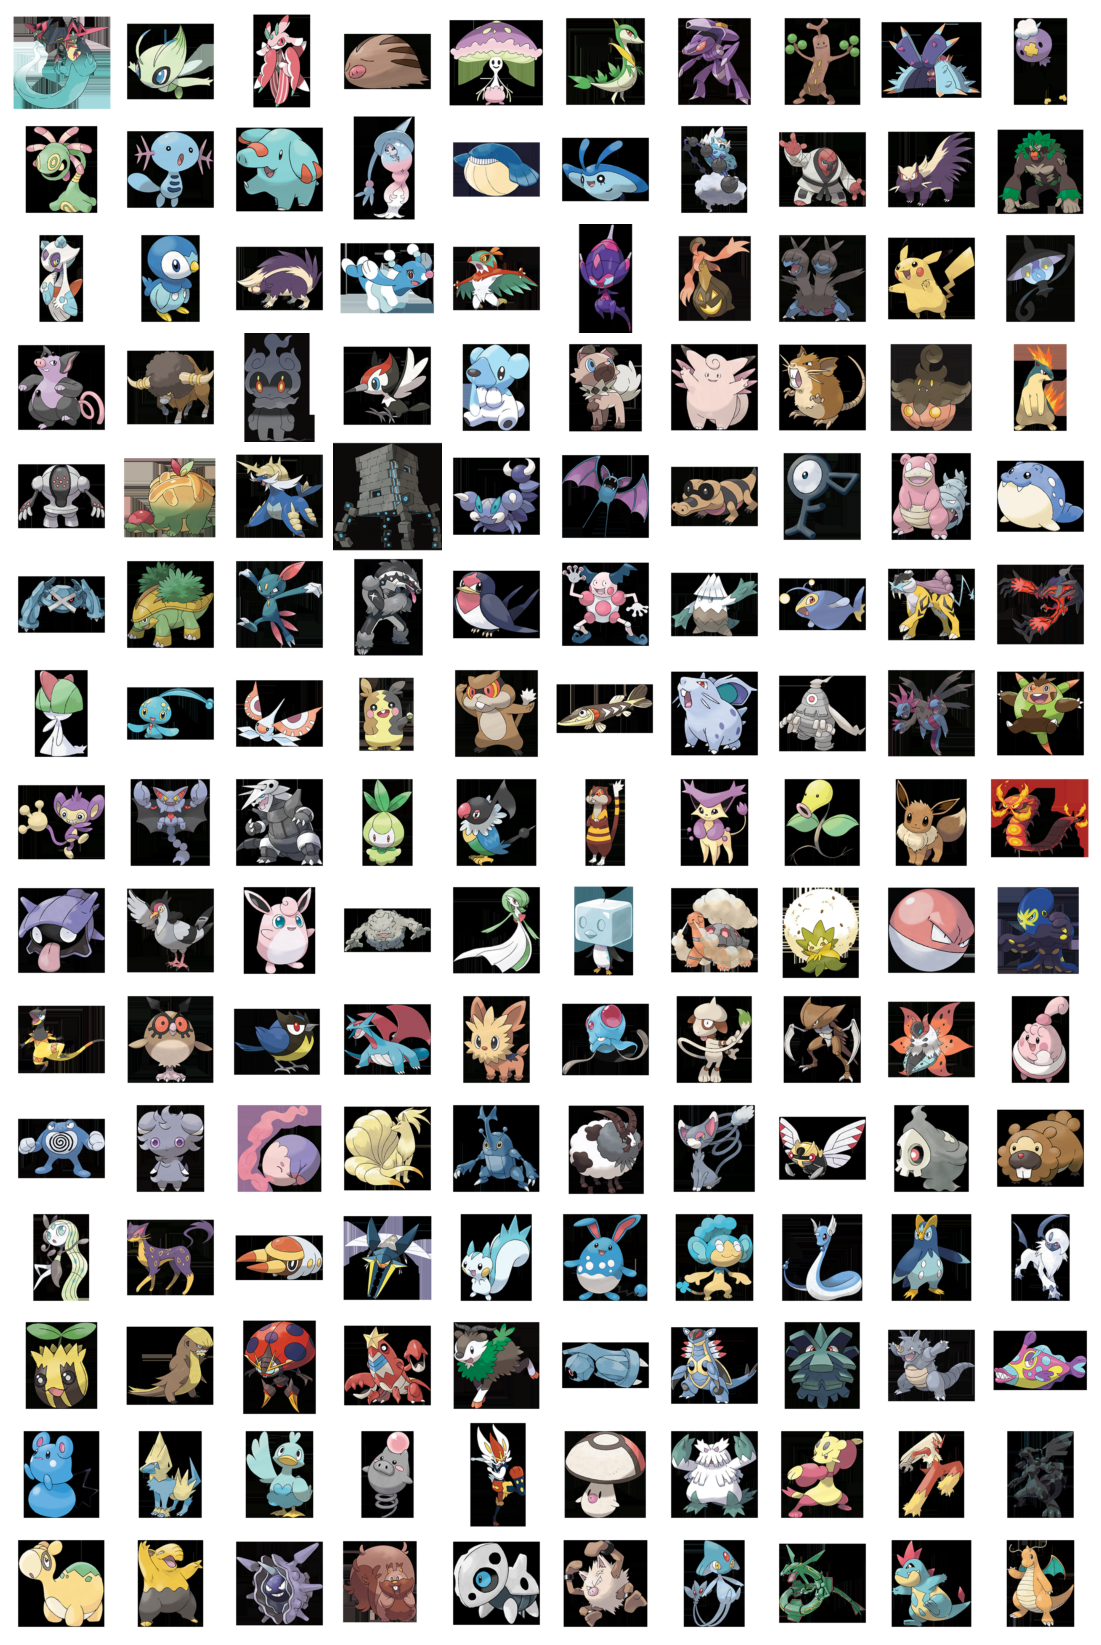

In [8]:
fig = plt.figure(figsize=(20,30))
grid = ImageGrid(fig,111,
                 nrows_ncols=(15, 10),  
                 axes_pad=0,  
                 )

for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.show()

Note que as imagens, que estão em `jpg` possuem um fundo preto circundando o Pokemon, além de termos uma tarja branca nas fotos. Para a classificação vamos despresar estes valores que são comuns em todas as fotos e não servem para a classificação.

Substitua agora `img` que não foi definida ainda, por alguma imagem que está na lista de imagens e faça um histograma para as cores da imagem. Note que no histograma eu não coloquei as bordas (branco e preto) tente incluí-las para ver o que acontece.

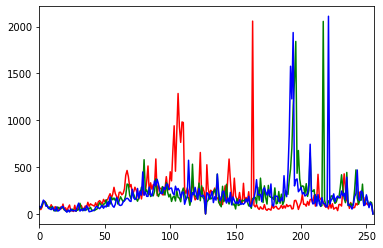

In [9]:
img = images[0]

# Calcular o histograma para cada canal
colors = ('r','g','b')
# Para cada canal: calcular o histograma e adicionar à lista de features
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([img], # Imagem
                            [i], # Índice do canal
                            None, # Sem usar máscara
                            [256], # Tamanho do histograma
                            [1,255]) # Range - Removendo o preto e o branco para uma melhor visualização!!!
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
plt.show()

### 3) Criando os Embeddings

Como já falamos em processamento de textos, é possível criar uma representação de algo complexo (um espaço vetorial grande) em um menor que seja representativo. A isto damo o nome de Embeddings, que é algo comum em aplicações de Aprendizagem de máquina.

Use a função auxiliar abaixo para a criação dos Embeddings das fotos dos Pokemons.

In [10]:
def embeddings(img):
    # Criar uma lista para o valor dos atributos
    features = []
    # Para cada canal: calcular o histograma e adicionar à lista de features
    for i in range(3):
        histogram, bin_edges = np.histogram(
            img[:, :, i], bins=10, range=(1, 255) # remover o preto e o branco (coloquei só 10 bins para cada canal de cor)
        )
        features.append(histogram)

    # Criar um vetor para as features (concatenação dos histogramas)
    return np.array(features).flatten().astype(int)

No código abaixo eu apenas preenchi o esqueleto do DataFrame, preenchendo ele com zeros.

Coloque como coluna índice `pokedex_number` e sobreescreva cada linha com os embeddings para as cores.

In [11]:
df2 = pd.DataFrame(np.zeros((len(df),10*3)).astype(int)) # (coloquei só 10 bins para cada canal de cor)
df2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df2.index = df.index
# Para cada imagem, calcular os atributos e adicionar à tabela
for i in range(df.shape[0]):
    df2.iloc[i] = embeddings(images[i])

Execute as células abaixo para normalizar o DataFrame. Não use normalização na coluna alvo.

In [13]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(df2)
transformer

Normalizer()

In [14]:
df2 = pd.DataFrame(transformer.transform(df2))
df2.index = df.index
df2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,0.039636,0.049284,0.136944,0.161391,0.262350,0.136510,0.097200,0.050154,0.065756,0.423828,...,0.034790,0.030488,0.079533,0.144572,0.122798,0.101328,0.099329,0.232883,0.137466,0.439517
2,0.181634,0.015012,0.021545,0.018368,0.015125,0.057664,0.021237,0.014688,0.110384,0.505005,...,0.151691,0.012256,0.020167,0.020945,0.018157,0.057616,0.019227,0.097966,0.043787,0.489085
3,0.047757,0.006737,0.008852,0.008035,0.012497,0.021990,0.014699,0.012030,0.071993,0.600575,...,0.050630,0.007306,0.016157,0.022588,0.069689,0.019540,0.018374,0.010047,0.038702,0.552468
4,0.101932,0.013955,0.022696,0.014125,0.009959,0.086107,0.052432,0.059714,0.010469,0.553746,...,0.107726,0.032981,0.015088,0.079024,0.085654,0.044952,0.004718,0.000368,0.000000,0.552740
5,0.100449,0.017525,0.007216,0.011195,0.115706,0.049090,0.017546,0.083501,0.049626,0.602238,...,0.102015,0.018515,0.065399,0.060183,0.015649,0.050327,0.034844,0.115108,0.122963,0.469915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,0.252768,0.021085,0.018262,0.021144,0.024921,0.054942,0.087592,0.043202,0.027276,0.533650,...,0.161964,0.023791,0.092128,0.107080,0.012597,0.017775,0.023344,0.014797,0.001791,0.521618
798,0.131799,0.009794,0.011747,0.021906,0.005561,0.014652,0.010927,0.023377,0.042900,0.563871,...,0.136410,0.011226,0.027402,0.008478,0.005496,0.012151,0.011617,0.048396,0.024185,0.554442
799,0.066357,0.056359,0.211295,0.010996,0.006121,0.007445,0.010228,0.012396,0.012780,0.564917,...,0.063421,0.059929,0.207150,0.010765,0.011379,0.015236,0.017079,0.051984,0.004605,0.508961


Agora acrescente uma coluna de `classe` e copie os valores de `type1` do primeiro DataFrame.

In [15]:
df2['classe'] = df.type1

Use o método `isin()` do Pandas para filtrar apenas as correspondências da lista abaixo em `df2`.

In [16]:
filtro = ['grass', 'fire', 'water']
# continua...
df2 = df2[df2.classe.isin(filtro)]
df2.classe.unique()

array(['grass', 'fire', 'water'], dtype=object)

Faça agora a fatorização da coluna `classes` para transformar seus valores em categorias.

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['classe'] = le.fit_transform(df2['classe'])
df2

/tmp/ipykernel_891715/2748978991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['classe'] = le.fit_transform(df2['classe'])


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,classe
pokedex_number,,,,,,,,,,,,,,,,,,,,,
1,0.039636,0.049284,0.136944,0.161391,0.262350,0.136510,0.097200,0.050154,0.065756,0.423828,...,0.030488,0.079533,0.144572,0.122798,0.101328,0.099329,0.232883,0.137466,0.439517,1
2,0.181634,0.015012,0.021545,0.018368,0.015125,0.057664,0.021237,0.014688,0.110384,0.505005,...,0.012256,0.020167,0.020945,0.018157,0.057616,0.019227,0.097966,0.043787,0.489085,1
3,0.047757,0.006737,0.008852,0.008035,0.012497,0.021990,0.014699,0.012030,0.071993,0.600575,...,0.007306,0.016157,0.022588,0.069689,0.019540,0.018374,0.010047,0.038702,0.552468,1
4,0.101932,0.013955,0.022696,0.014125,0.009959,0.086107,0.052432,0.059714,0.010469,0.553746,...,0.032981,0.015088,0.079024,0.085654,0.044952,0.004718,0.000368,0.000000,0.552740,0
5,0.100449,0.017525,0.007216,0.011195,0.115706,0.049090,0.017546,0.083501,0.049626,0.602238,...,0.018515,0.065399,0.060183,0.015649,0.050327,0.034844,0.115108,0.122963,0.469915,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0.266425,0.007121,0.019495,0.023625,0.057960,0.035255,0.005049,0.004976,0.014505,0.516536,...,0.006888,0.017190,0.015322,0.026499,0.083832,0.017160,0.015176,0.003590,0.499069,0
779,0.285706,0.022974,0.013105,0.015207,0.010048,0.038688,0.051509,0.018337,0.007111,0.503415,...,0.019470,0.085262,0.029459,0.012583,0.015684,0.013388,0.008930,0.003399,0.497780,2
787,0.020099,0.006645,0.009472,0.003537,0.005846,0.007622,0.007030,0.029320,0.090031,0.636845,...,0.007918,0.014623,0.011574,0.098038,0.046888,0.057070,0.022245,0.027499,0.508615,1


### 4) Divisão dos dados

Divida os dados em 20% para teste.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('classe',axis=1), df2['classe'], test_size=0.2, random_state=0)

Execute a célula abaixo para conferir se a mesma proporção de treino e teste foi respeitada:

In [19]:
aux1 = y_train.value_counts().sort_values(ascending=False)
aux2 = y_test.value_counts().sort_values(ascending=False)

aux1 = aux1/sum(aux1) * 100
aux2 = aux2/sum(aux2) * 100

# Imprir de forma tabelada para comparação
pd.concat([aux1, aux2], axis=1)

,classe,classe
2,46.666667,46.938776
1,32.820513,28.571429
0,20.512821,24.489796


Podemos confirmar que cada conjunto de dados tem uma distribuição semelhante de classes, portanto, ao treinar a regressão logística, poderemos generalizar e reduzir o risco de overfitting aos dados de treinamento! 

### 5) Faça agora a validação cruzada

Para melhorar a performance do seu modelo faça a validação cruzada com 5 folds e use um limite de 1000 iterações.

In [26]:
clf = LogisticRegressionCV(cv=5, max_iter=1000).fit(X_train, y_train)
lg = LogisticRegression(max_iter=1000).fit(X_train, y_train)

/home/gustavo/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/gustavo/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Veja agora quão bom ficou o seu modelo com o `classification_report`.

In [27]:
y_pred1 = clf.predict(X_test)
y_pred2 = lg.predict(X_test)

print(classification_report(y_test, y_pred1, zero_division=0))
print(classification_report(y_test, y_pred2, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        14
           2       0.47      1.00      0.64        23

    accuracy                           0.47        49
   macro avg       0.16      0.33      0.21        49
weighted avg       0.22      0.47      0.30        49

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00        14
           2       0.47      1.00      0.64        23

    accuracy                           0.47        49
   macro avg       0.16      0.33      0.21        49
weighted avg       0.22      0.47      0.30        49



Parabéns, você ensinou ao computador a identificar Pokemons de água, fogo e grama! 